In [ ]:

import os
import cv2     as cv
import numpy   as np
from PIL import Image
from ultralytics import YOLO
import calibri as cal




class Data_Collector:

    def __init__(self,imgs_dir_path, cam_calibration_path):
        self.imgs_dir_path = imgs_dir_path
        data               = np.load(cam_calibration_path,allow_pickle=True)
        self.mtx           = data['mtx']
        self.dist          = data['dist']
    
    def take_image(self, img_name , cam_idx):

        abs_path = os.path.join(self.imgs_dir_path,img_name)

        cap = cv.VideoCapture(cam_idx)
        
        if not cap.isOpened():
            print("Cannot open camera")
            exit()

        ret, frame = cap.read()

        if not ret:
            print("Can't take an image. Exiting ....")
            cap.release()
            cv.destroyAllWindows()
            return None
        else:       
            img = np.asarray(frame)
            undistored_img = cal.undistort(img,self.mtx,self.dist)
            success = cv.imwrite(abs_path,undistored_img)
            
            if success:
                print(f"Image successfully saved to {abs_path}")
               
            else:
                print(f"An error occured. The image was not able to be captured.")
                             
        cap.release()
        cv.destroyAllWindows()
        return abs_path

    
    def get_img_count(self, filepath):
        
        img_dir = os.listdir(filepath)
        
        count = 0

        for file in img_dir:
            if file.endswith(".jpg") or file.endswith(".png") or file.endswith(".jpeg"):
                count+=1
        print(f"There is currently {count} images in your image directory.")
        return count + 1

    def find_camera_idx(self):
        
        for cam_idx in range(-1,10):

            cap = cv.VideoCapture(cam_idx)
            
            if cap.isOpened():
                print(f"Camera is open on idx {cam_idx}")

    def midpoint(self, coordinates):

        x1 = coordinates[0].item()
        y1 = coordinates[1].item()

        x2 = coordinates[2].item()
        y2 = coordinates[3].item()

        return ((x1+x2)/2),((y1+y2)/2)

    
        




In [2]:
obj = Data_Collector("/home/mgarcia/Desktop/images/","./calibrationdata.npz")

In [4]:
obj.find_camera_idx()

Camera is open on idx -1
Camera is open on idx 2


[ WARN:0@31.203] global cap_v4l.cpp:913 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@31.204] global obsensor_uvc_stream_channel.cpp:158 getStreamChannelGroup Camera index out of range
[ WARN:0@31.204] global cap_v4l.cpp:913 open VIDEOIO(V4L2:/dev/video1): can't open camera by index
[ERROR:0@31.205] global obsensor_uvc_stream_channel.cpp:158 getStreamChannelGroup Camera index out of range
[ WARN:0@31.214] global cap_v4l.cpp:913 open VIDEOIO(V4L2:/dev/video3): can't open camera by index
[ERROR:0@31.215] global obsensor_uvc_stream_channel.cpp:158 getStreamChannelGroup Camera index out of range
[ WARN:0@31.215] global cap_v4l.cpp:913 open VIDEOIO(V4L2:/dev/video4): can't open camera by index
[ERROR:0@31.216] global obsensor_uvc_stream_channel.cpp:158 getStreamChannelGroup Camera index out of range
[ WARN:0@31.216] global cap_v4l.cpp:913 open VIDEOIO(V4L2:/dev/video5): can't open camera by index
[ERROR:0@31.216] global obsensor_uvc_stream_channel.cpp:158 getStreamChan

In [5]:
img_path = obj.take_image("img4.png",2)

Image successfully saved to /home/mgarcia/Pictures/img4.png


In [6]:
model = YOLO("../../object_detection_model/model/mg_model_6/best.pt")

In [7]:
results = model(source = img_path,conf = .6)



image 1/1 /home/mgarcia/Pictures/img4.png: 480x640 1 grey pallet, 1 white pallet, 500.8ms
Speed: 19.6ms preprocess, 500.8ms inference, 23.4ms postprocess per image at shape (1, 3, 480, 640)


In [20]:
img_num = obj.get_img_count("/home/mgarcia/Desktop/images")

img_name = "img" + str(img_num) + ".png"

obj.take_image(img_name=img_name,cam_idx=2)

There is currently 10 images in your image directory.
Image successfully saved to /home/mgarcia/Desktop/images/img11.png


'/home/mgarcia/Desktop/images/img11.png'

In [19]:
from PIL import Image
from matplotlib import pyplot as plt
import torch

In [ ]:
def midpoint(x1,y1,x2,y2):

    return ((x1+x2)/2),((y1+y2)/2)

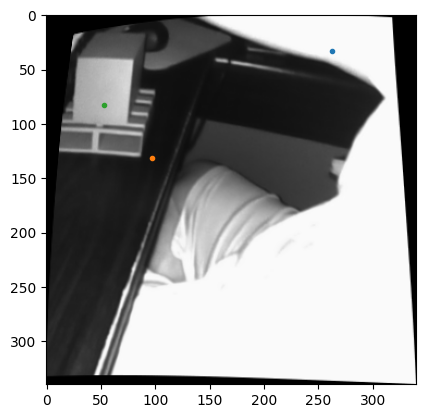

In [ ]:
img1 = Image.open("/home/mgarcia/Desktop/images/img3.png")

plt.imshow(img1,cmap="gray")


x1 = 8.6232
y1 = 32.8789

x2 = 96.5123
y2 = 131.7683



m1 , m2 = midpoint(x1,y1,x2,y2)


plt.plot(x1,y1,marker=".")
plt.plot(x2,y2,marker=".")
plt.plot(m1,m2,marker=".")

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/marco/github/numaware/.venv/lib64/python3.11/site-packages/IPython/core/interactiveshell.py", line 3549, in run_code
  File "/tmp/ipykernel_17642/1075689881.py", line 1, in <module>
    from src.abb import abb
ModuleNotFoundError: No module named 'src'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/marco/github/numaware/.venv/lib64/python3.11/site-packages/pygments/styles/__init__.py", line 45, in get_style_by_name
ModuleNotFoundError: No module named 'pygments.styles.default'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/marco/github/numaware/.venv/lib64/python3.11/site-packages/IPython/core/interactiveshell.py", line 2173, in showtraceback
  File "/home/marco/github/numaware/.venv/lib64/python3.11/site-packages/IPython/core/ultratb.py", line 1182, in structured_traceback
  File "/home/marco/gi

In [5]:

import os


while os.getcwd() != "/" and ".gitignore" not in os.listdir(os.getcwd()):
	os.chdir("..")
	if os.getcwd() == "/":
		print("COULD NOT FIND pyproject.toml.  Invalid project base file.")


print("Current Working Directory:  ", os.getcwd())

from src.abb import Robot

Current Working Directory:   /home/marco/github/numaware/joint_model


In [6]:
R = Robot(ip = '192.168.125.1')

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/marco/github/numaware/.venv/lib64/python3.11/site-packages/IPython/core/interactiveshell.py", line 3549, in run_code
  File "/tmp/ipykernel_17642/813290670.py", line 1, in <module>
    R = Robot(ip = '192.168.125.1')
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/marco/github/numaware/joint_model/src/abb.py", line 31, in __init__
    self.connect_motion((ip, port_motion))
  File "/home/marco/github/numaware/joint_model/src/abb.py", line 46, in connect_motion
    self.sock.connect(remote)
TimeoutError: timed out

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/marco/github/numaware/.venv/lib64/python3.11/site-packages/pygments/styles/__init__.py", line 45, in get_style_by_name
ModuleNotFoundError: No module named 'pygments.styles.default'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/marco/githu

In [22]:
j = [12.3,4.2,32.2]

In [28]:
parse_joints(j)

'12.3-4.2-32.2'

In [ ]:

import cv2
import numpy as np
import glob
from PIL import Image



def calibrate(folder, rows=6, cols=9, save_file='calibrationdata.npz'):
    """
    Calibrates the camera to get the undistortion parameters. Capture a few images of the chessboard pattern
    with your camera and store them in `folder`. This function obtains the undistortion parameters and saves
    them in `save_file`.
    
    Argugments:
    ----------
    `folder`: String, required
        The folder where the images of the chessboard pattern are stored.
    `rows`, `cols`: Integers, optional
        The number of horizontal and vertical lines on your chessboard.
    `save_file`: String, optional
        Path to save the undistortion parameters.
    """

    # Stop / decision criteria for the algorithm
    criteria = (cv2.TERM_CRITERIA_MAX_ITER + cv2.TERM_CRITERIA_EPS, 30, 0.001)

    # Required Variables
    objectPoints = np.zeros((rows * cols, 3), np.float32)
    objectPoints[:, :2] = np.mgrid[0:rows, 0:cols].T.reshape(-1, 2)
    objectPointsArray = []
    imgPointsArray = []
    img_paths = glob.glob(f'{folder.rstrip("/")}/*.jpg') + glob.glob(f'{folder.rstrip("/")}/*.png')

    print(img_paths)
    
    found = 0 
    # Repeat n times until successful calibration is done.
    for img_path in img_paths:
        # Read the next image and convert to grayscale
        img = cv2.imread(img_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # gray = np.array(255 - gray)

        # Find the corners of the chessboard within the frame
        
        isSucces, corners = cv2.findChessboardCorners(gray, (rows, cols), flags=cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FILTER_QUADS)

        print(img_path, isSucces, corners)

        # If the corners were found succesfully
        if isSucces:
            '''
            If the number of rows and columns we specified is correctly determined
            With the cornerSubPix () method, the sub-pixel of the corners or radial spine points,
            it repeats itself to find the correct position.
            '''
            corners = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)

            # Save the points we just achieved
            objectPointsArray.append(objectPoints)
            imgPointsArray.append(corners)
            
            found += 1
            
    print(f'{found} usable images found in {folder}.')

    # Save the K and D values obtained as an npz archive
    print(objectPointsArray, imgPointsArray, gray)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objectPointsArray, imgPointsArray, gray.shape[::-1], None, None)
    np.savez(save_file, mtx=mtx, dist=dist, rvecs=rvecs, tvecs=tvecs)
    
    return mtx, dist

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_point_clicker import clicker

fig, ax = plt.subplots(constrained_layout=True)
ax.plot(np.sin(np.arange(200)/(5*np.pi)))
klicker = clicker(ax, ["event"], markers=["x"])

plt.show()

print(klicker.get_positions())